# Exploratory Data Analysis for Telco Customer Churn

## Imports + Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import sqlite3

## Reading Datasets

In [3]:
conn = sqlite3.connect('../data/churn.db')

In [4]:
demographics = pd.read_sql_query('SELECT * FROM demographics;', conn)
demographics.head()

,customer_id,count,gender,age,under_30,senior_citizen,married,dependents,num_dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


In [5]:
location = pd.read_sql_query('SELECT * FROM location;', conn)
location.head()

,location_id,customer_id,count,country,state,city,zip_code,lat_long,latitude,longitude
0,OXCZEW7397,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,FCCECI8494,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,HEHUQY7254,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,WIUHRF2613,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,CFEZBF4415,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


In [6]:
population = pd.read_sql_query('SELECT * FROM population;', conn)
population.head()

,population_id,zip_code,pop
0,1,90001,"54,492"
1,2,90002,"44,586"
2,3,90003,"58,198"
3,4,90004,"67,852"
4,5,90005,"43,019"


In [7]:
services = pd.read_sql_query('SELECT * FROM services;', conn)
services.head()

,service_id,customer_id,count,quarter,referred_friend,num_referrals,tenure_months,offer,phone_service,avg_monthly_long_distance_charge,...,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,IJKDQVSWH3522,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20.0,0.00,59.65
1,BFKMZJAIE2285,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0.0,390.80,1024.10
2,EIMVJQBMT7187,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0.0,203.94,1910.88
3,EROZQXDUU4979,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0.0,494.00,2995.07
4,GEEYSJUHY6991,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0.0,234.21,3102.36


In [8]:
status = pd.read_sql_query('SELECT * FROM status;', conn)
status.head()

,status_id,customer_id,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason
0,SWSORB1252,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,SNAEQA8572,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,LMBQNN3714,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,VRZYZI9978,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,FDNAKX1688,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


## Initial Data Exploration, Sanity Checks

In [9]:
demographics.shape, location.shape, population.shape, services.shape, status.shape

((7043, 9), (7043, 10), (1671, 3), (7043, 31), (7043, 12))

Each dataset has 7043 rows, with the exception of the population lookup table (which tracks since population does not have a customer_id foreign key). 

In [10]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   count           7043 non-null   int64 
 2   gender          7043 non-null   object
 3   age             7043 non-null   int64 
 4   under_30        7043 non-null   object
 5   senior_citizen  7043 non-null   object
 6   married         7043 non-null   object
 7   dependents      7043 non-null   object
 8   num_dependents  7043 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 495.3+ KB


In [11]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location_id  7043 non-null   object 
 1   customer_id  7043 non-null   object 
 2   count        7043 non-null   int64  
 3   country      7043 non-null   object 
 4   state        7043 non-null   object 
 5   city         7043 non-null   object 
 6   zip_code     7043 non-null   object 
 7   lat_long     7043 non-null   object 
 8   latitude     7043 non-null   float64
 9   longitude    7043 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 550.4+ KB


In [12]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   population_id  1671 non-null   int64 
 1   zip_code       1671 non-null   object
 2   pop            1671 non-null   object
dtypes: int64(1), object(2)
memory usage: 39.3+ KB


In [13]:
services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   service_id                        7043 non-null   object 
 1   customer_id                       7043 non-null   object 
 2   count                             7043 non-null   int64  
 3   quarter                           7043 non-null   object 
 4   referred_friend                   7043 non-null   object 
 5   num_referrals                     7043 non-null   int64  
 6   tenure_months                     7043 non-null   int64  
 7   offer                             3166 non-null   object 
 8   phone_service                     7043 non-null   object 
 9   avg_monthly_long_distance_charge  7043 non-null   float64
 10  multiple_lines                    7043 non-null   object 
 11  internet_service                  7043 non-null   object 
 12  intern

'offer' and 'internet_type' columns contain null values, needs investigation

/var/folders/zj/d482_qjd6szf0_0dg2klzvq80000gn/T/ipykernel_78953/971186895.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  services_copy['offer'].fillna('No Offer', inplace=True)


<Axes: xlabel='offer'>

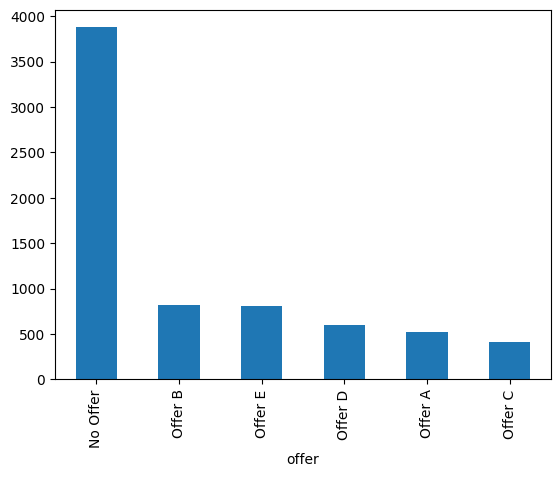

In [14]:
services_copy = services.copy()
services_copy['offer'].fillna('No Offer', inplace=True)
services_copy['offer'].value_counts().plot(kind='bar')

Treating None values as "no offer received," there exists a significant class imbalance between customer's not receiving an offer vs. receiving one of the A-E offers. Will have to dig into the relationship between "offer" and customer churn

In [15]:
# Now investigating 'internet_type' and 'internet_service' features
services['internet_service'].value_counts()

internet_service
Yes    5517
No     1526
Name: count, dtype: int64

In [16]:
services['internet_type'].value_counts().sum()

np.int64(5517)

/var/folders/zj/d482_qjd6szf0_0dg2klzvq80000gn/T/ipykernel_78953/3549508147.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  services_copy['internet_type'].fillna('No Internet', inplace=True)


<Axes: xlabel='internet_type'>

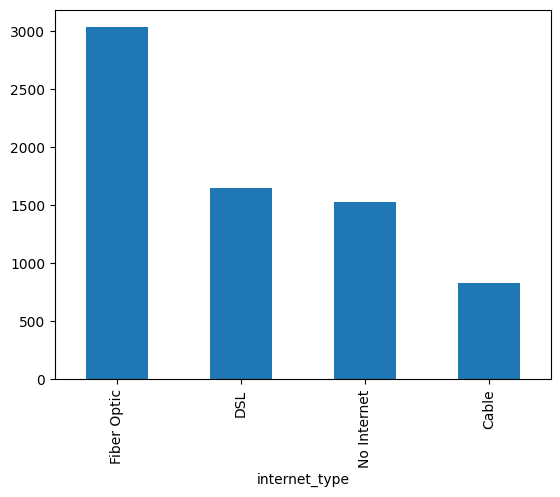

In [17]:
services_copy['internet_type'].fillna('No Internet', inplace=True)
services_copy['internet_type'].value_counts().plot(kind='bar')

In [18]:
services_copy[['internet_service', 'internet_type']].groupby('internet_service').value_counts()

internet_service  internet_type
No                No Internet      1526
Yes               Fiber Optic      3035
                  DSL              1652
                  Cable             830
Name: count, dtype: int64

It appears "No" responses in the 'internet_service' column account for the "None" values in the 'internet_type' column, will treat "None" values as "No Internet"

In [19]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   status_id           7043 non-null   object
 1   customer_id         7043 non-null   object
 2   count               7043 non-null   int64 
 3   quarter             7043 non-null   object
 4   satisfaction_score  7043 non-null   int64 
 5   customer_status     7043 non-null   object
 6   churn_label         7043 non-null   object
 7   churn_value         7043 non-null   int64 
 8   churn_score         7043 non-null   int64 
 9   cltv                7043 non-null   int64 
 10  churn_category      1869 non-null   object
 11  churn_reason        1869 non-null   object
dtypes: int64(5), object(7)
memory usage: 660.4+ KB


'churn_category' and 'churn_reason' have null values, needs investigation

In [20]:
status['churn_category'].value_counts()

churn_category
Competitor         841
Attitude           314
Dissatisfaction    303
Price              211
Other              200
Name: count, dtype: int64

In [21]:
status['churn_reason'].value_counts()

churn_reason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: c

In [22]:
status_copy = status.copy()
status_copy['churn_category'].fillna('No Churn', inplace=True)
status_copy[['churn_value', 'churn_category']].groupby('churn_value').value_counts()

/var/folders/zj/d482_qjd6szf0_0dg2klzvq80000gn/T/ipykernel_78953/2051236377.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  status_copy['churn_category'].fillna('No Churn', inplace=True)


churn_value  churn_category 
0            No Churn           5174
1            Competitor          841
             Attitude            314
             Dissatisfaction     303
             Price               211
             Other               200
Name: count, dtype: int64

It appears "0" values in the 'churn_value' column account for the "None" values in the 'churn_category' column, will treat "None" values as "No Churn"

In [23]:
status_copy['churn_reason'].fillna('No Churn', inplace=True)
status_copy[['churn_category', 'churn_reason']].groupby('churn_category').value_counts()

/var/folders/zj/d482_qjd6szf0_0dg2klzvq80000gn/T/ipykernel_78953/529997248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  status_copy['churn_reason'].fillna('No Churn', inplace=True)


churn_category   churn_reason                             
Attitude         Attitude of support person                    220
                 Attitude of service provider                   94
Competitor       Competitor had better devices                 313
                 Competitor made better offer                  311
                 Competitor offered more data                  117
                 Competitor offered higher download speeds     100
Dissatisfaction  Product dissatisfaction                        77
                 Network reliability                            72
                 Service dissatisfaction                        63
                 Limited range of services                      37
                 Lack of self-service on Website                29
                 Poor expertise of online support               13
                 Poor expertise of phone support                12
No Churn         No Churn                                     5174
Oth

Similarly, the "None" values in 'churn_reason' column are all accounted for by the lack of 'churn_category' and 'churn_value' columns, so we will treat these values as "No Churn"

In [24]:
demographics.isna().sum()

customer_id       0
count             0
gender            0
age               0
under_30          0
senior_citizen    0
married           0
dependents        0
num_dependents    0
dtype: int64

In [25]:
location.isna().sum()

location_id    0
customer_id    0
count          0
country        0
state          0
city           0
zip_code       0
lat_long       0
latitude       0
longitude      0
dtype: int64

In [26]:
population.isna().sum()

population_id    0
zip_code         0
pop              0
dtype: int64

In [27]:
services_copy.isna().sum()

service_id                          0
customer_id                         0
count                               0
quarter                             0
referred_friend                     0
num_referrals                       0
tenure_months                       0
offer                               0
phone_service                       0
avg_monthly_long_distance_charge    0
multiple_lines                      0
internet_service                    0
internet_type                       0
avg_monthly_gb_download             0
online_security                     0
online_backup                       0
device_protection                   0
premium_tech_support                0
streaming_tv                        0
streaming_movies                    0
streaming_music                     0
unlimited_data                      0
contract                            0
paperless_billing                   0
payment_method                      0
monthly_charge                      0
total_charge

In [28]:
status_copy.isna().sum()

status_id             0
customer_id           0
count                 0
quarter               0
satisfaction_score    0
customer_status       0
churn_label           0
churn_value           0
churn_score           0
cltv                  0
churn_category        0
churn_reason          0
dtype: int64

Now we have no null values in the dataset, joining datasets on 'customer_id' column

In [29]:
# Remove 'quarter' and 'count' columns from applicable tables
datasets = [demographics, location, population, services_copy, status_copy]
for i in range(len(datasets)):
    if 'quarter' in datasets[i].columns:
        print(f"{i} 'quarter': {datasets[i]['quarter'].value_counts()}")
    if 'count' in datasets[i].columns:
        print(f"{i} 'count': {datasets[i]['count'].value_counts()}\n")

0 'count': count
1    7043
Name: count, dtype: int64

1 'count': count
1    7043
Name: count, dtype: int64

3 'quarter': quarter
Q3    7043
Name: count, dtype: int64
3 'count': count
1    7043
Name: count, dtype: int64

4 'quarter': quarter
Q3    7043
Name: count, dtype: int64
4 'count': count
1    7043
Name: count, dtype: int64



In [30]:
# Remove 'quarter' and 'count' columns from applicable tables
demographics_copy = demographics.copy()
location_copy = location.copy()
population_copy = population.copy()

datasets = [demographics_copy, location_copy, population_copy, services_copy, status_copy]
for i in range(len(datasets)):
    if 'quarter' in datasets[i].columns:
        datasets[i].drop(columns=['quarter'], inplace=True)
    if 'count' in datasets[i].columns:
        datasets[i].drop(columns=['count'], inplace=True)

Removed 'quarter' and 'count' columns from dataset because 'quarter' is always "Q3" and 'count' is always 1

In [31]:
# Ensure merged on columns are strings
demographics_copy['customer_id'] = demographics_copy['customer_id'].astype(str)
location_copy['customer_id'] = location_copy['customer_id'].astype(str)

# Merge on 'customer_id'
data = pd.merge(
    demographics_copy,
    location_copy,
    on='customer_id',
    how='outer'
)

population['zip_code'] = population['zip_code'].astype(str)

data = pd.merge(
    data, 
    population, 
    on='zip_code', 
    how='inner'
)

data['customer_id'] = data['customer_id'].astype(str)
services_copy['customer_id'] = services_copy['customer_id'].astype(str)

# Merge on 'customer_id'
data = pd.merge(
    data,
    services_copy,
    on='customer_id',
    how='outer'
)

status_copy['customer_id'] = status_copy['customer_id'].astype(str)

# Merge on 'customer_id'
data = pd.merge(
    data,
    status_copy,
    on='customer_id',
    how='outer'
)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       7043 non-null   object 
 1   gender                            7043 non-null   object 
 2   age                               7043 non-null   int64  
 3   under_30                          7043 non-null   object 
 4   senior_citizen                    7043 non-null   object 
 5   married                           7043 non-null   object 
 6   dependents                        7043 non-null   object 
 7   num_dependents                    7043 non-null   int64  
 8   location_id                       7043 non-null   object 
 9   country                           7043 non-null   object 
 10  state                             7043 non-null   object 
 11  city                              7043 non-null   object 
 12  zip_co

Used left joins for all tables with customer_id to preserve original list of customer_id's found in demographics.csv. Used inner join for population lookup table, only want population sizes for zip codes in the overall data table

In [32]:
data.columns

Index(['customer_id', 'gender', 'age', 'under_30', 'senior_citizen', 'married',
       'dependents', 'num_dependents', 'location_id', 'country', 'state',
       'city', 'zip_code', 'lat_long', 'latitude', 'longitude',
       'population_id', 'pop', 'service_id', 'referred_friend',
       'num_referrals', 'tenure_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charge', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'status_id', 'satisfaction_score', 'customer_status',
       'churn_label', 'churn_value', 'churn_score', 'cltv', 'churn_category',
       'chur

Now we have a null-free dataset of the demographics, location, services, and status datasets after cleaning

In [105]:
# Save cleaned data to CSV
data.to_csv('../data/raw/churn_v1.csv', index=False)

## EDA

In [34]:
# Remove duplicates
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       7043 non-null   object 
 1   gender                            7043 non-null   object 
 2   age                               7043 non-null   int64  
 3   under_30                          7043 non-null   object 
 4   senior_citizen                    7043 non-null   object 
 5   married                           7043 non-null   object 
 6   dependents                        7043 non-null   object 
 7   num_dependents                    7043 non-null   int64  
 8   location_id                       7043 non-null   object 
 9   country                           7043 non-null   object 
 10  state                             7043 non-null   object 
 11  city                              7043 non-null   object 
 12  zip_co

No duplicates, number of rows maintained

### Outlier Detection

In [35]:
# Histogram, Boxplot, Summary Stats Function

def univariate_analysis(data, column):
  # Histogram
  plt.figure(figsize=(8,5))
  sns.histplot(data[column], kde=True)
  plt.title(f'Distribution of {column}')
  plt.xlabel(f'{column}')
  plt.ylabel('Frequency')
  plt.show()

  # Boxplot
  plt.figure(figsize=(8, 5))
  sns.boxplot(y=data[column], color="red")
  plt.title(f"Boxplot of {column} (Outlier Detection)")
  plt.ylabel(f"{column}")
  plt.show()

  # Summary statistics
  summary_stat = data[f"{column}"].describe()
  print(summary_stat)

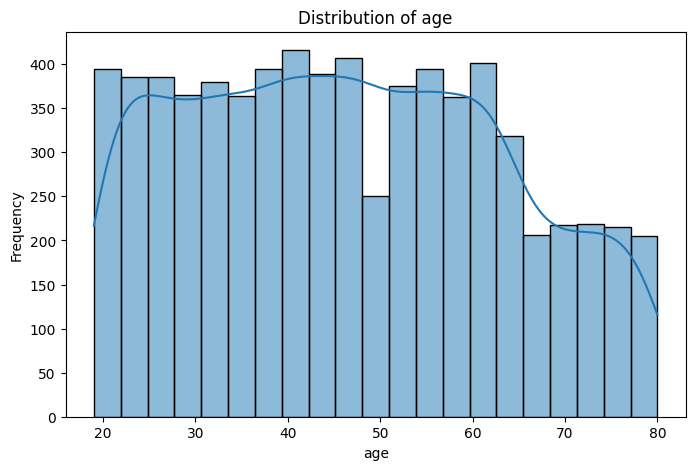

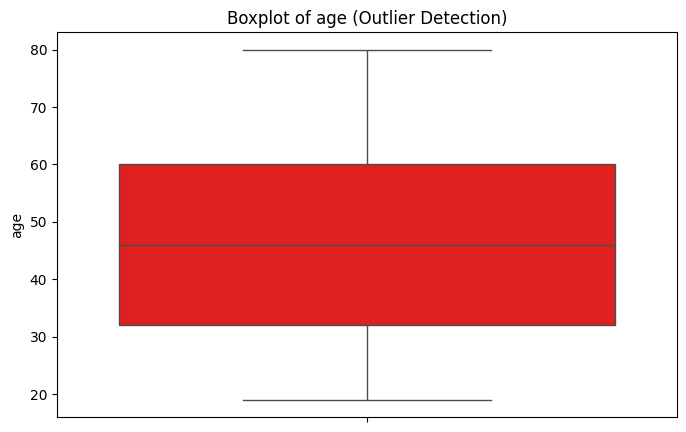

count    7043.000000
mean       46.509726
std        16.750352
min        19.000000
25%        32.000000
50%        46.000000
75%        60.000000
max        80.000000
Name: age, dtype: float64


In [36]:
univariate_analysis(data, 'age')

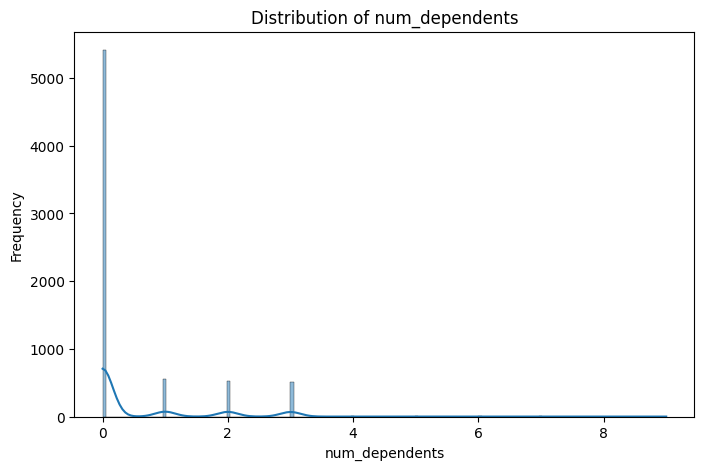

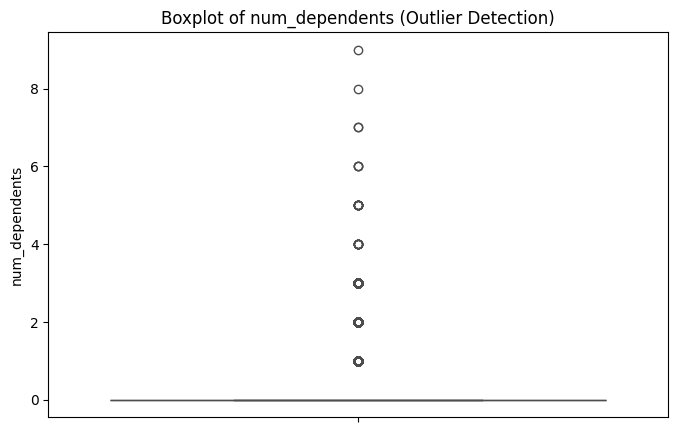

count    7043.000000
mean        0.468692
std         0.962802
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: num_dependents, dtype: float64


In [37]:
univariate_analysis(data, 'num_dependents')

Overwhelming imbalance for num_dependents: dominated by 0 values, making higher values outliers. Having dependents or not may be a more useful feature.

<Axes: xlabel='has_dependents', ylabel='count'>

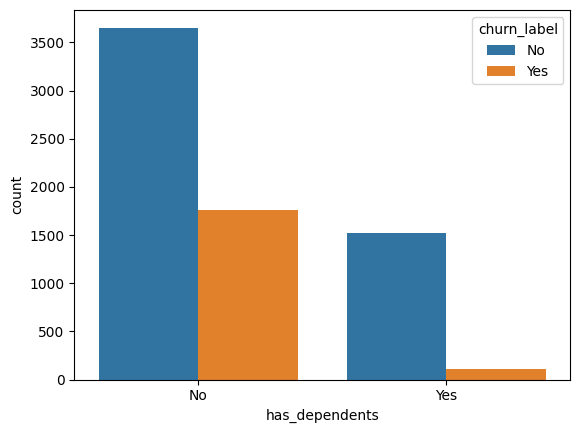

In [104]:
df = data.copy()

df['has_dependents'] = np.where(df['num_dependents'] > 0, 'Yes', 'No')
sns.countplot(data=df, x='has_dependents', hue='churn_label')

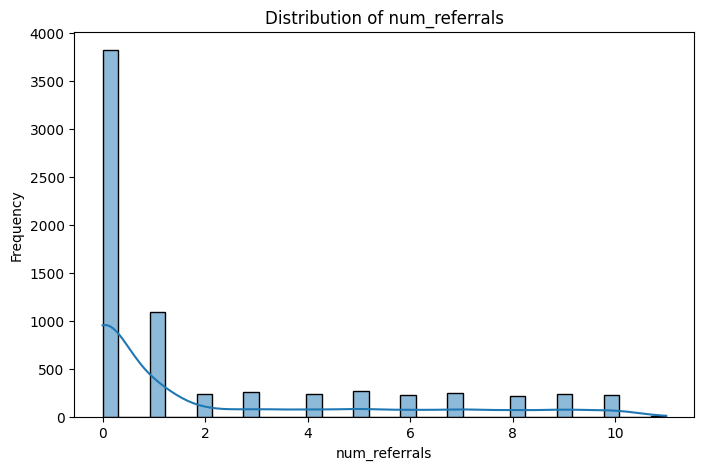

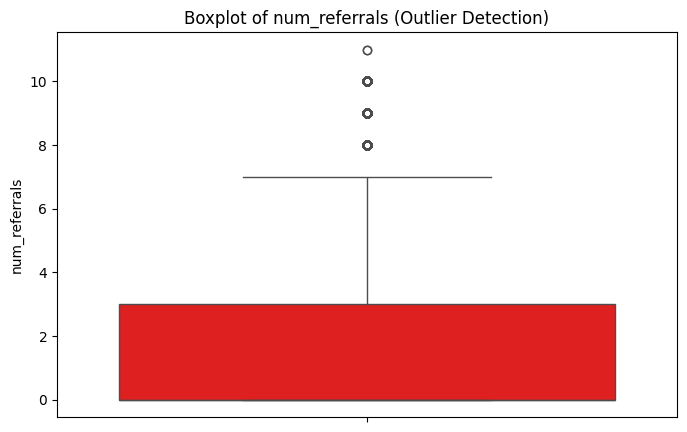

count    7043.000000
mean        1.951867
std         3.001199
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        11.000000
Name: num_referrals, dtype: float64


In [38]:
univariate_analysis(data, 'num_referrals')

In [39]:
data['num_referrals'].value_counts()

num_referrals
0     3821
1     1086
5      264
3      255
7      248
9      238
2      236
4      236
10     223
6      221
8      213
11       2
Name: count, dtype: int64

Similar to num_dependents, num_referrals has an overwhelming number of customers who have not referred anyone. Looking at whether or not they have referred someone may be valuable.

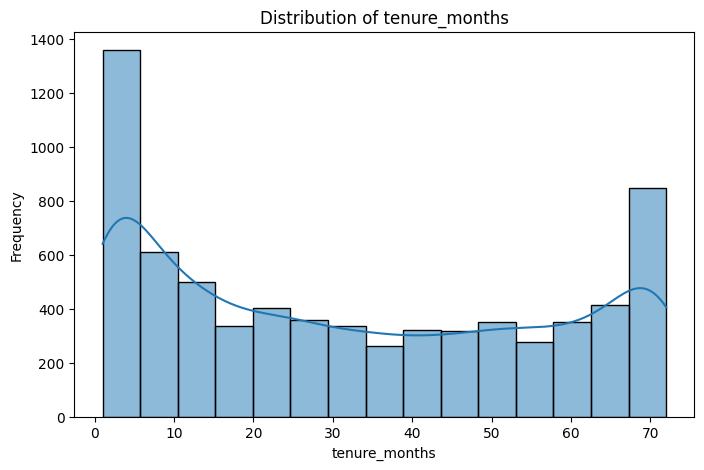

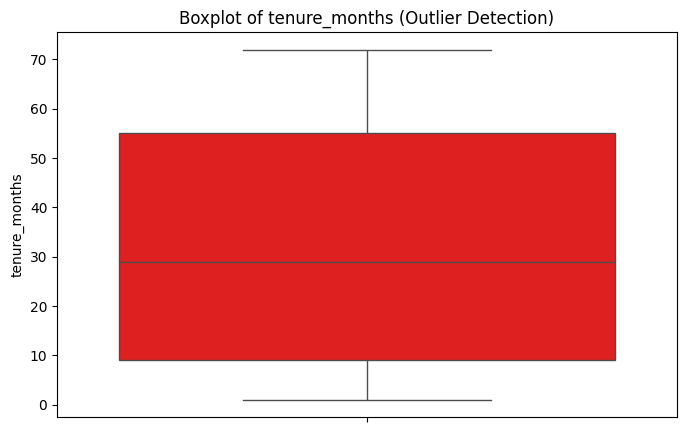

count    7043.000000
mean       32.386767
std        24.542061
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure_months, dtype: float64


In [40]:
univariate_analysis(data, 'tenure_months')

<Axes: xlabel='tenure_bucket', ylabel='count'>

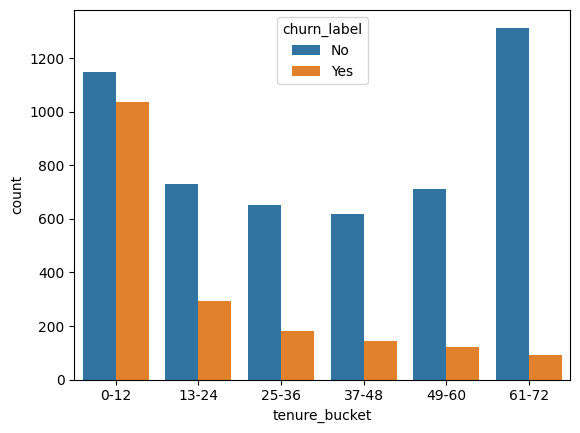

In [41]:
# Create tenure buckets to group months by year-long periods
df = data.copy()

df['tenure_bucket'] = pd.cut(df['tenure_months'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
sns.countplot(data=df, x='tenure_bucket', hue='churn_label')

Customer churn sees an overall decrease in count across year-long tenure buckets, even in overall increased customer counts.

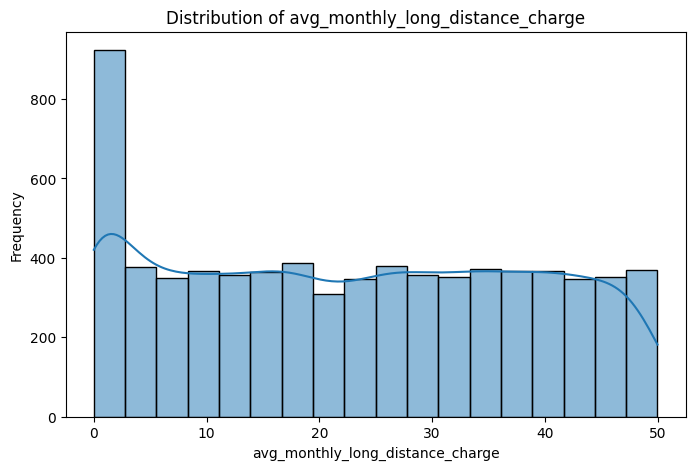

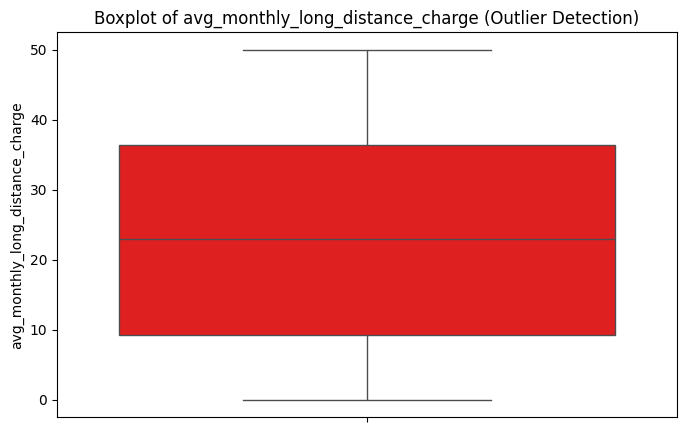

count    7043.000000
mean       22.958954
std        15.448113
min         0.000000
25%         9.210000
50%        22.890000
75%        36.395000
max        49.990000
Name: avg_monthly_long_distance_charge, dtype: float64


In [42]:
univariate_analysis(data, 'avg_monthly_long_distance_charge')

Again, significant amount of customers who haven't been charged for long distance, may be valuable to group by whether customers have long distance charges overall

/var/folders/zj/d482_qjd6szf0_0dg2klzvq80000gn/T/ipykernel_78953/1510887057.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


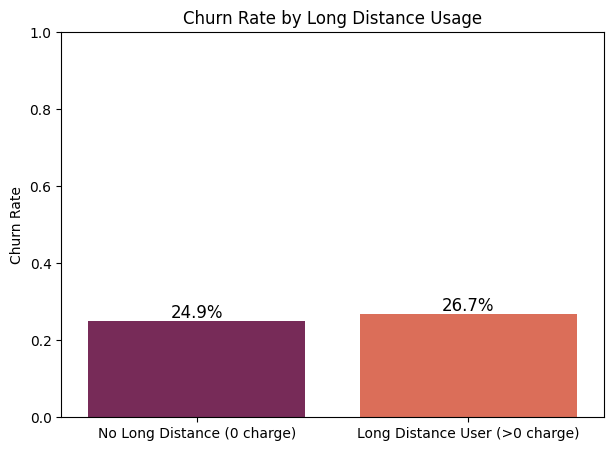

In [43]:
df = data.copy()

# Create binary feature: 0 = no long distance, 1 = long distance user
df['long_distance_user'] = (df['avg_monthly_long_distance_charge'] > 0).astype(int)

# Group by user type and calculate churn rate
churn_rates = df.groupby('long_distance_user')['churn_value'].mean().reset_index()

# Replace labels for clarity
churn_rates['long_distance_user'] = churn_rates['long_distance_user'].map({
    0: 'No Long Distance (0 charge)',
    1: 'Long Distance User (>0 charge)'
})

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(
    data=churn_rates,
    x='long_distance_user',
    y='churn_value',
    palette='rocket'
)

# Annotate churn rate on bars
for i, row in churn_rates.iterrows():
    plt.text(i, row['churn_value'] + 0.01, f"{row['churn_value']:.1%}", ha='center', fontsize=12)

plt.title("Churn Rate by Long Distance Usage")
plt.ylabel("Churn Rate")
plt.xlabel("")
plt.ylim(0, 1)
plt.show()


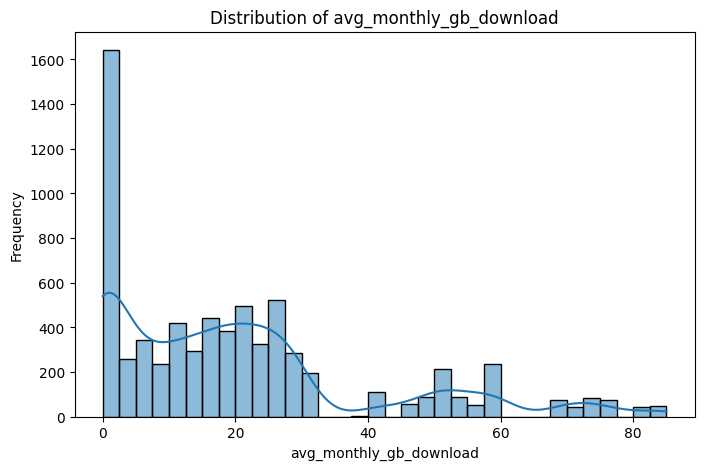

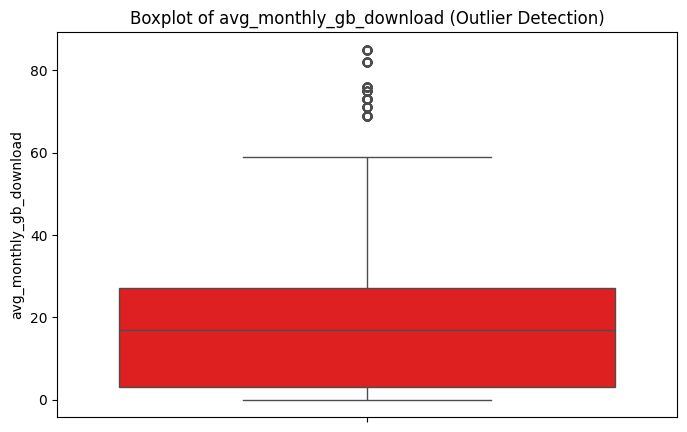

count    7043.000000
mean       20.515405
std        20.418940
min         0.000000
25%         3.000000
50%        17.000000
75%        27.000000
max        85.000000
Name: avg_monthly_gb_download, dtype: float64


In [44]:
univariate_analysis(data, 'avg_monthly_gb_download')

Significant amount of customers with average monthly GB download of 0, replicate procedure done for long distance charges.

/var/folders/zj/d482_qjd6szf0_0dg2klzvq80000gn/T/ipykernel_78953/563884488.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


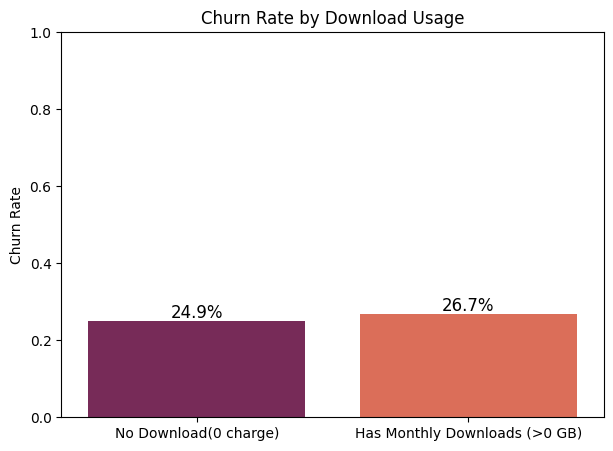

In [45]:
df = data.copy()

# Create binary feature: 0 = no long distance, 1 = long distance user
df['monthly_gb_download'] = (df['avg_monthly_long_distance_charge'] > 0).astype(int)

# Group by user type and calculate churn rate
churn_rates = df.groupby('monthly_gb_download')['churn_value'].mean().reset_index()

# Replace labels for clarity
churn_rates['monthly_gb_download'] = churn_rates['monthly_gb_download'].map({
    0: 'No Download(0 charge)',
    1: 'Has Monthly Downloads (>0 GB)'
})

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(
    data=churn_rates,
    x='monthly_gb_download',
    y='churn_value',
    palette='rocket'
)

# Annotate churn rate on bars
for i, row in churn_rates.iterrows():
    plt.text(i, row['churn_value'] + 0.01, f"{row['churn_value']:.1%}", ha='center', fontsize=12)

plt.title("Churn Rate by Download Usage")
plt.ylabel("Churn Rate")
plt.xlabel("")
plt.ylim(0, 1)
plt.show()


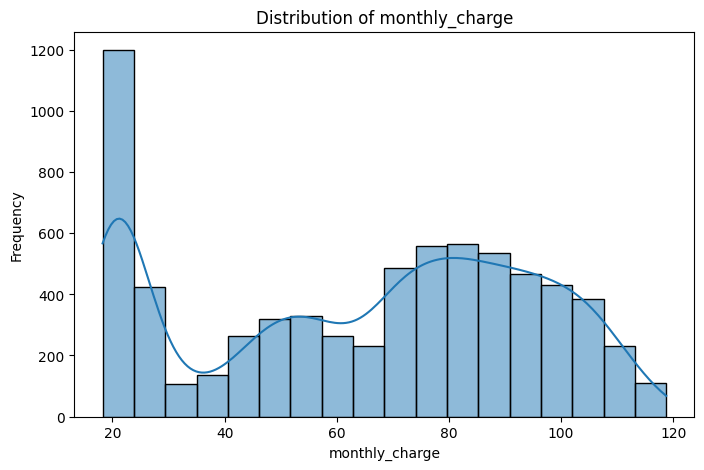

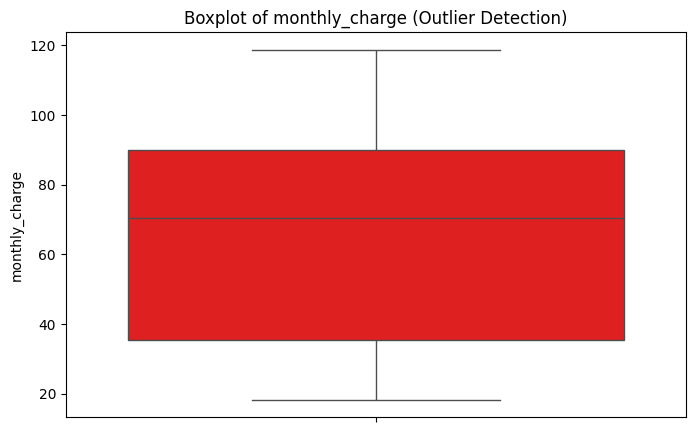

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charge, dtype: float64


In [46]:
univariate_analysis(data, 'monthly_charge')

High volume of customers with low monthly_charge, could be inidicative of subscription to basic plan. 

/var/folders/zj/d482_qjd6szf0_0dg2klzvq80000gn/T/ipykernel_78953/1642492257.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_band = df.groupby('charge_bucket')['churn_value'].mean() * 100


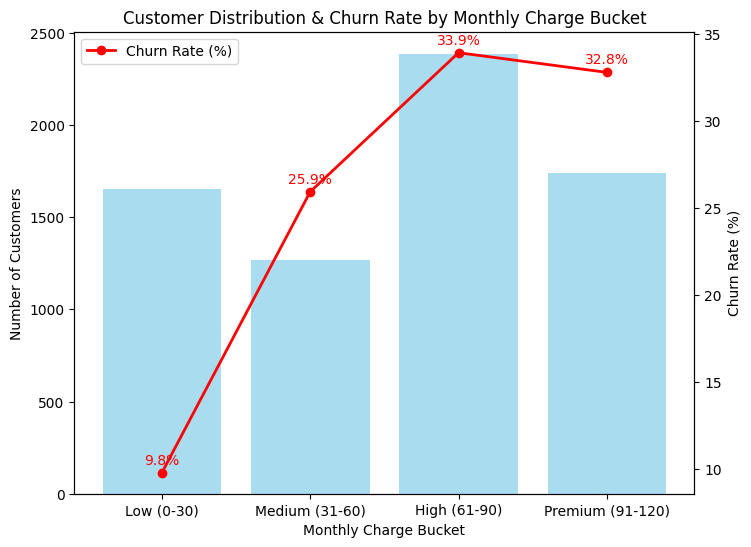

In [47]:
df = data.copy()

# Bin monthly charges
df['charge_bucket'] = pd.cut(df['monthly_charge'],
                           bins=[0, 30, 60, 90, 120],
                           labels=['Low (0-30)', 'Medium (31-60)', 'High (61-90)', 'Premium (91-120)'])

# Group by charge band and churn
churn_by_band = df.groupby('charge_bucket')['churn_value'].mean() * 100
count_by_band = df['charge_bucket'].value_counts().sort_index()

# Plot churn rate
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar chart for customer count
ax1.bar(count_by_band.index, count_by_band.values, color='skyblue', alpha=0.7)
ax1.set_ylabel("Number of Customers")
ax1.set_xlabel("Monthly Charge Bucket")

# Secondary axis for churn rate
ax2 = ax1.twinx()
ax2.plot(churn_by_band.index, churn_by_band.values, color='red', marker='o', linewidth=2, label='Churn Rate (%)')
ax2.set_ylabel("Churn Rate (%)")

# Add labels for churn rate
for i, val in enumerate(churn_by_band.values):
    ax2.text(i, val + 0.5, f"{val:.1f}%", color='red', ha='center')

plt.title("Customer Distribution & Churn Rate by Monthly Charge Bucket")
ax2.legend(loc="upper left")
plt.show()


Significantly lower churn rate in the bucket of low monthly_charge customers

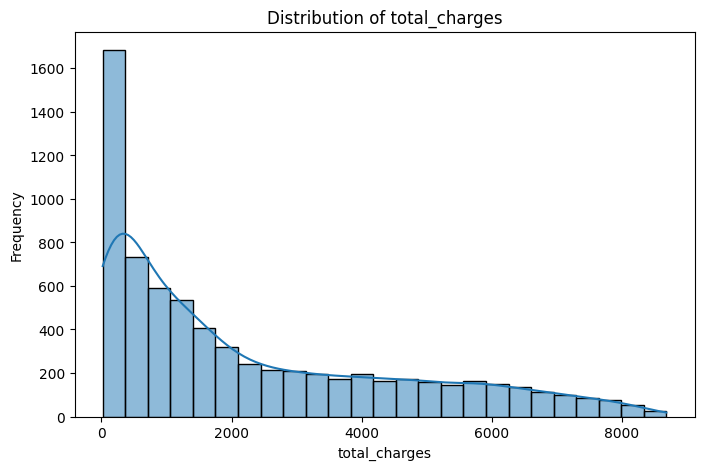

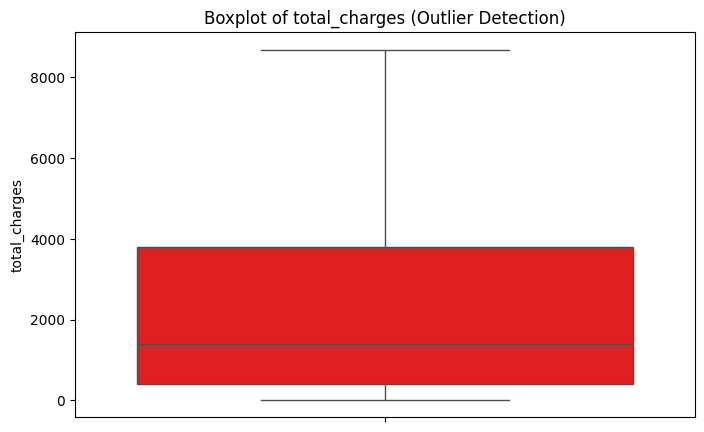

count    7043.000000
mean     2280.381264
std      2266.220462
min        18.800000
25%       400.150000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: total_charges, dtype: float64


In [48]:
univariate_analysis(data, 'total_charges')

High correlation between total_charges and monthly_charge/tenure_months, approximately:
* total_charges = monthly_charge * tenure_months + any other premiums (like distance calls, downloads, etc.)
Likely to be redundant feature

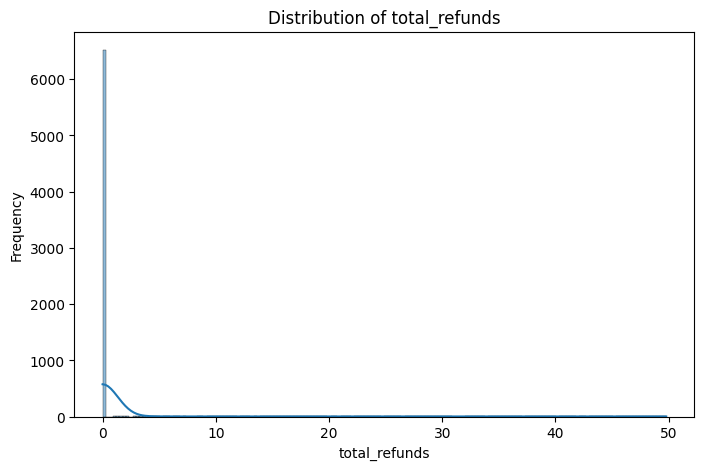

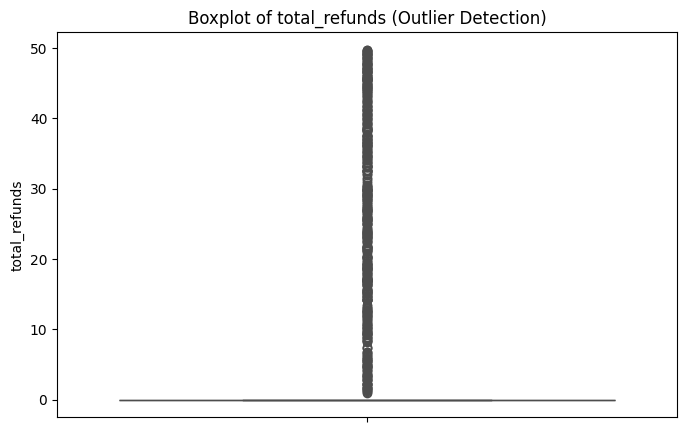

count    7043.000000
mean        1.962182
std         7.902614
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        49.790000
Name: total_refunds, dtype: float64


In [49]:
univariate_analysis(data, 'total_refunds')

Extremely high volume of 0.0 total_refund values, bin by customers with and without refund totals (0 vs. > 0)

/var/folders/zj/d482_qjd6szf0_0dg2klzvq80000gn/T/ipykernel_78953/2920161671.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


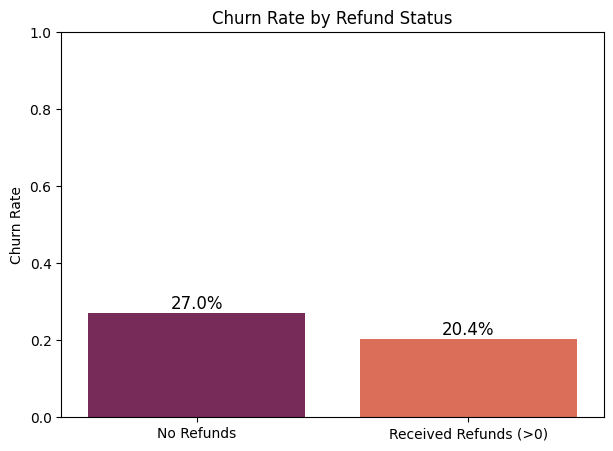

In [50]:
df = data.copy()

# Create binary feature: 0 = no long distance, 1 = long distance user
df['received_refund'] = (df['total_refunds'] > 0).astype(int)

# Group by user type and calculate churn rate
churn_rates = df.groupby('received_refund')['churn_value'].mean().reset_index()

# Replace labels for clarity
churn_rates['received_refund'] = churn_rates['received_refund'].map({
    0: 'No Refunds',
    1: 'Received Refunds (>0)'
})

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(
    data=churn_rates,
    x='received_refund',
    y='churn_value',
    palette='rocket'
)

# Annotate churn rate on bars
for i, row in churn_rates.iterrows():
    plt.text(i, row['churn_value'] + 0.01, f"{row['churn_value']:.1%}", ha='center', fontsize=12)

plt.title("Churn Rate by Refund Status")
plt.ylabel("Churn Rate")
plt.xlabel("")
plt.ylim(0, 1)
plt.show()


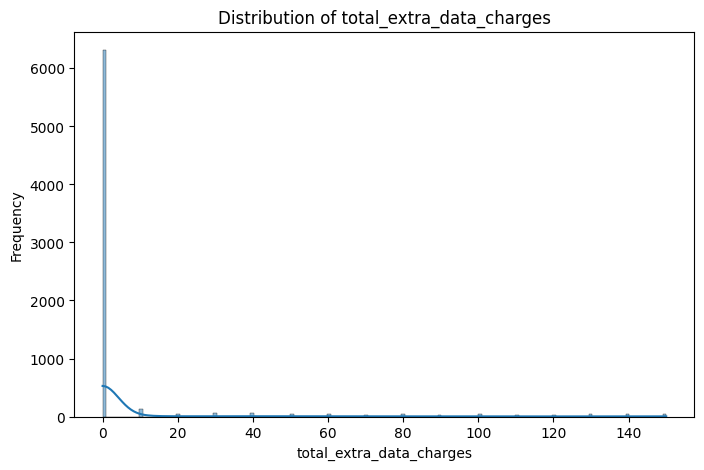

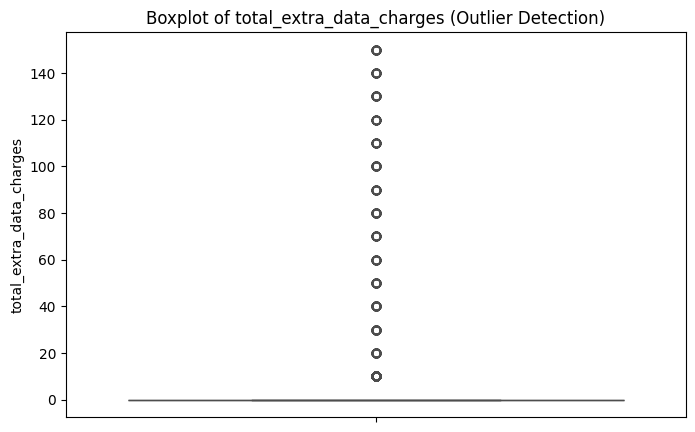

count    7043.000000
mean        6.860713
std        25.104978
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       150.000000
Name: total_extra_data_charges, dtype: float64


In [51]:
univariate_analysis(data, 'total_extra_data_charges')

/var/folders/zj/d482_qjd6szf0_0dg2klzvq80000gn/T/ipykernel_78953/4192907477.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


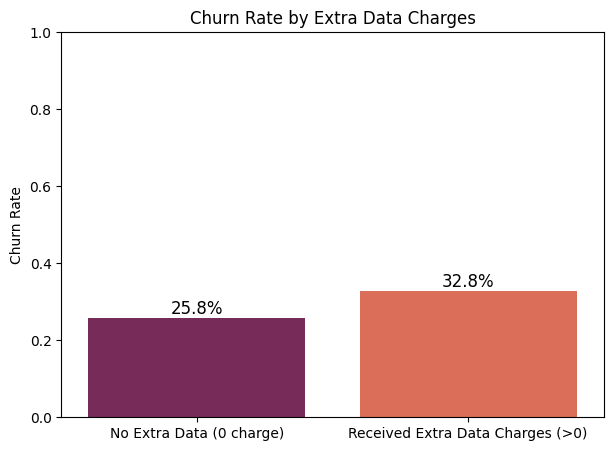

In [52]:
df = data.copy()

# Create binary feature: 0 = no long distance, 1 = long distance user
df['extra_data_charges'] = (df['total_extra_data_charges'] > 0).astype(int)

# Group by user type and calculate churn rate
churn_rates = df.groupby('extra_data_charges')['churn_value'].mean().reset_index()

# Replace labels for clarity
churn_rates['extra_data_charges'] = churn_rates['extra_data_charges'].map({
    0: 'No Extra Data (0 charge)',
    1: 'Received Extra Data Charges (>0)'
})

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(
    data=churn_rates,
    x='extra_data_charges',
    y='churn_value',
    palette='rocket'
)

# Annotate churn rate on bars
for i, row in churn_rates.iterrows():
    plt.text(i, row['churn_value'] + 0.01, f"{row['churn_value']:.1%}", ha='center', fontsize=12)

plt.title("Churn Rate by Extra Data Charges")
plt.ylabel("Churn Rate")
plt.xlabel("")
plt.ylim(0, 1)
plt.show()


Higher churn rate for receiving extra data charges could indicate disatisfaction with being charged

Similar to total_charges, total_long_distance_charges highly correlated to avg_monthly_long_distance_charge and tenure_months.
May be redundant feature

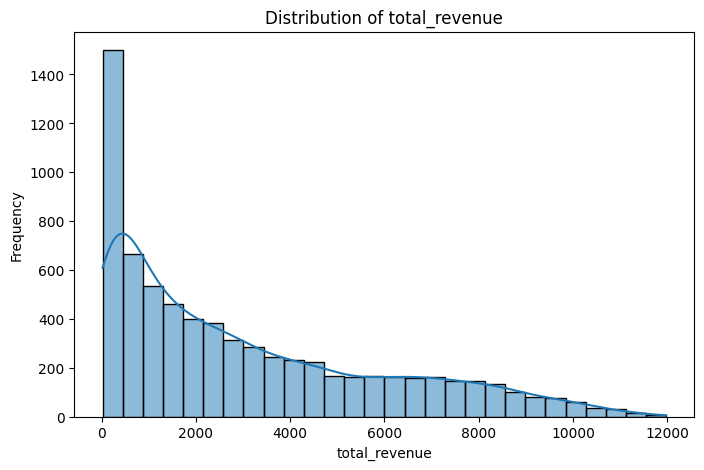

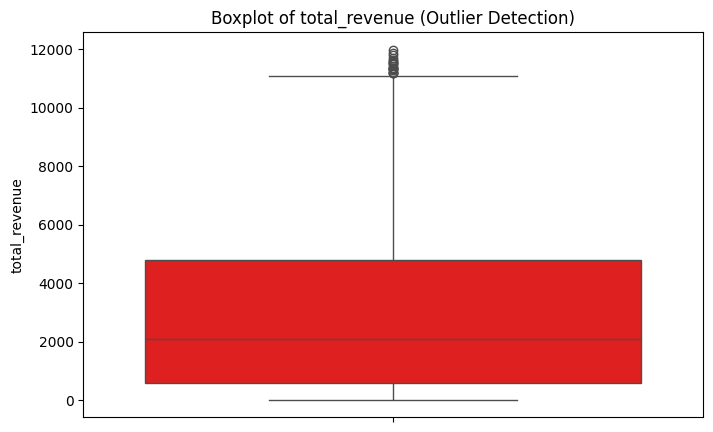

count     7043.000000
mean      3034.379056
std       2865.204542
min         21.360000
25%        605.610000
50%       2108.640000
75%       4801.145000
max      11979.340000
Name: total_revenue, dtype: float64


In [53]:
univariate_analysis(data, 'total_revenue')

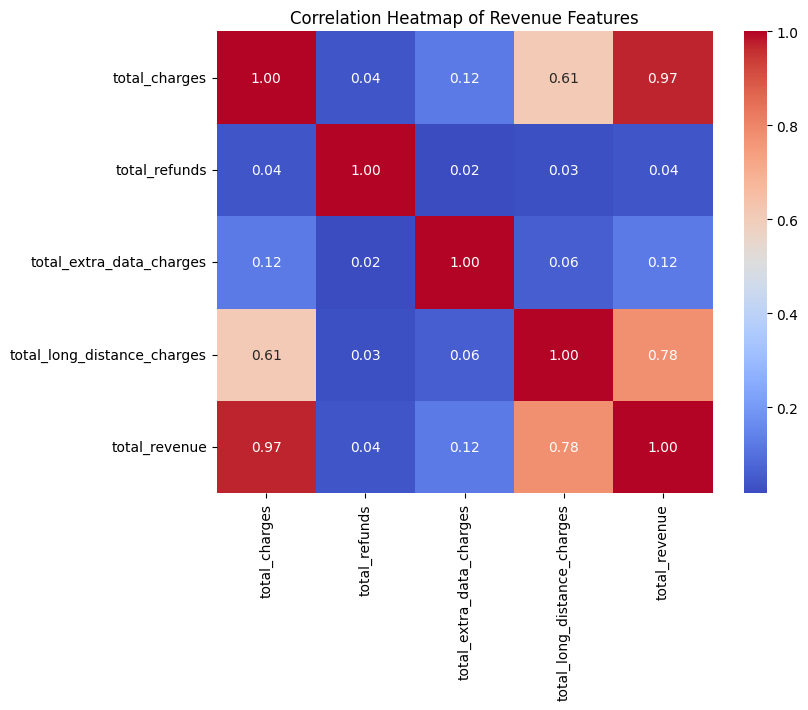

In [54]:
features = [
    'total_charges',
    'total_refunds',
    'total_extra_data_charges',
    'total_long_distance_charges',
    'total_revenue'
]

corr = data[features].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Revenue Features")
plt.show()

total_revenue = total_charges - total_refunds + total_extra_data_charges + total_long_distance_charges
Appears that total_charges and total_long_distance_charges account for much of the total_revenue per customer with high correlation

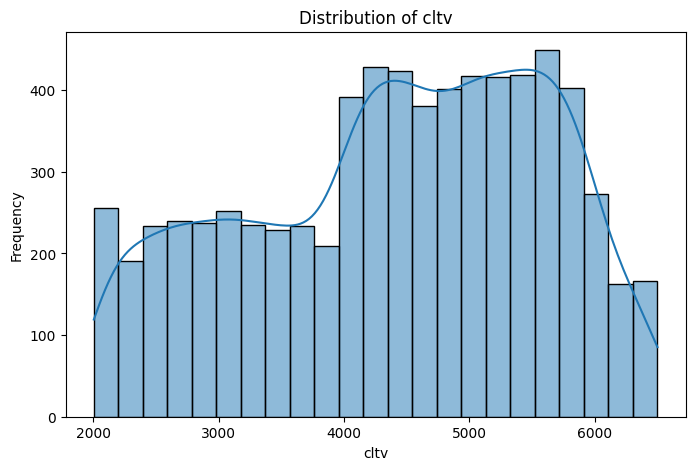

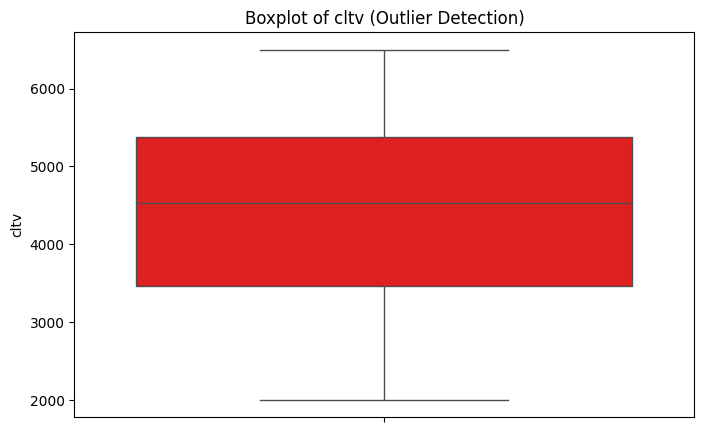

count    7043.000000
mean     4400.295755
std      1183.057152
min      2003.000000
25%      3469.000000
50%      4527.000000
75%      5380.500000
max      6500.000000
Name: cltv, dtype: float64


In [55]:
univariate_analysis(data, 'cltv')

### Target Variables
* churn_value / churn_label
* churn_score

<Axes: ylabel='Churn Value Distribution:'>

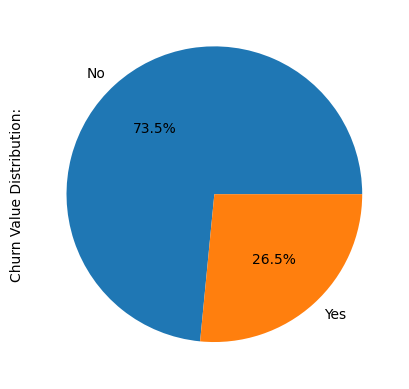

In [56]:
data['churn_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', label='Churn Value Distribution:')

Slight class imbalance favoring customers who have not churned. It will be more significant to identify a customer who does churn or is more likely to in the future.

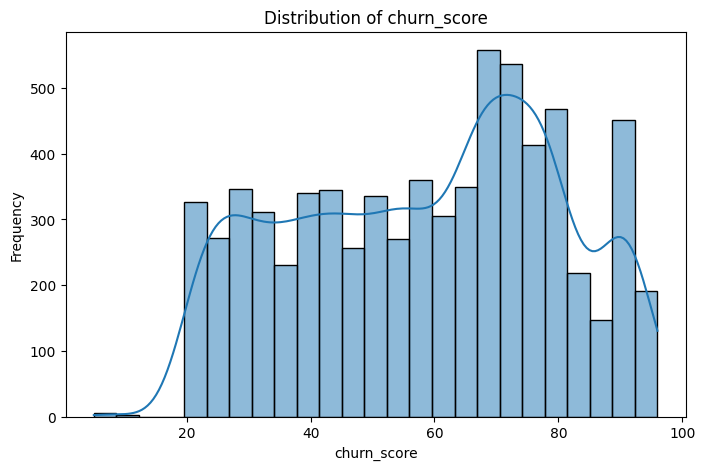

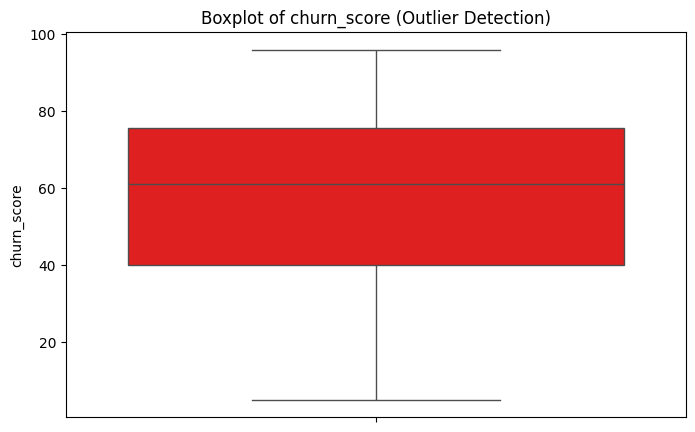

count    7043.000000
mean       58.505040
std        21.170031
min         5.000000
25%        40.000000
50%        61.000000
75%        75.500000
max        96.000000
Name: churn_score, dtype: float64


In [57]:
univariate_analysis(data, 'churn_score')

### Categorical Data

<Axes: xlabel='gender', ylabel='count'>

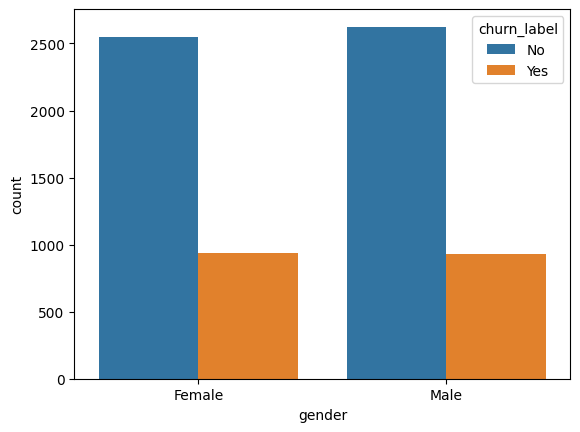

In [58]:
sns.countplot(data=data, x='gender', hue='churn_label')

Gender appears to have little influence on churn counts based on count plot

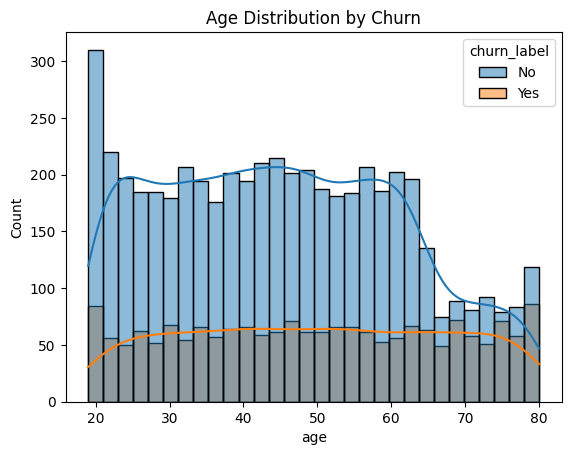

In [59]:
# Age distribution
sns.histplot(data=data, x='age', bins=30, kde=True, hue='churn_label')
plt.title("Age Distribution by Churn")
plt.show()


In [60]:
pd.crosstab(data['senior_citizen'], data['churn_label'], normalize='index')

churn_label,No,Yes
senior_citizen,,
No,0.763938,0.236062
Yes,0.583187,0.416813


A bit more likely to churn as a senior-citizen

In [61]:
pd.crosstab(data['under_30'], data['churn_label'], normalize='index')

churn_label,No,Yes
under_30,,
No,0.722616,0.277384
Yes,0.783012,0.216988


Not much of a difference for those under 30 vs. not

<Axes: xlabel='num_dependents', ylabel='count'>

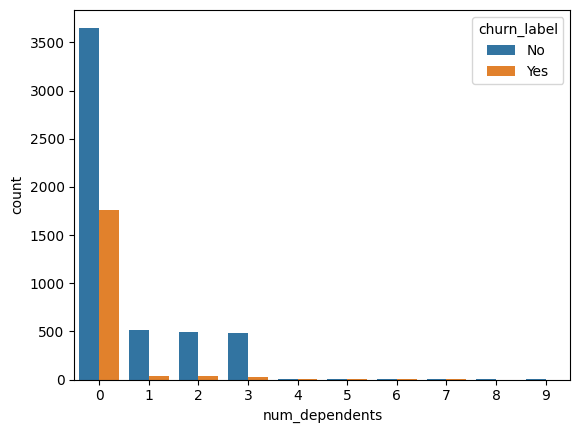

In [62]:
sns.countplot(data=data, x='num_dependents', hue='churn_label')

<Axes: xlabel='dependents', ylabel='count'>

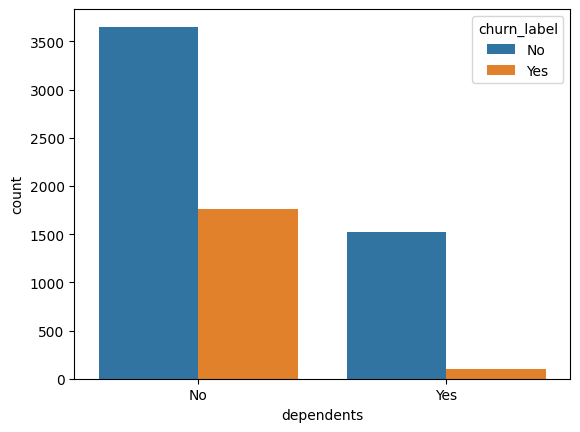

In [63]:
sns.countplot(data=data, x='dependents', hue='churn_label')

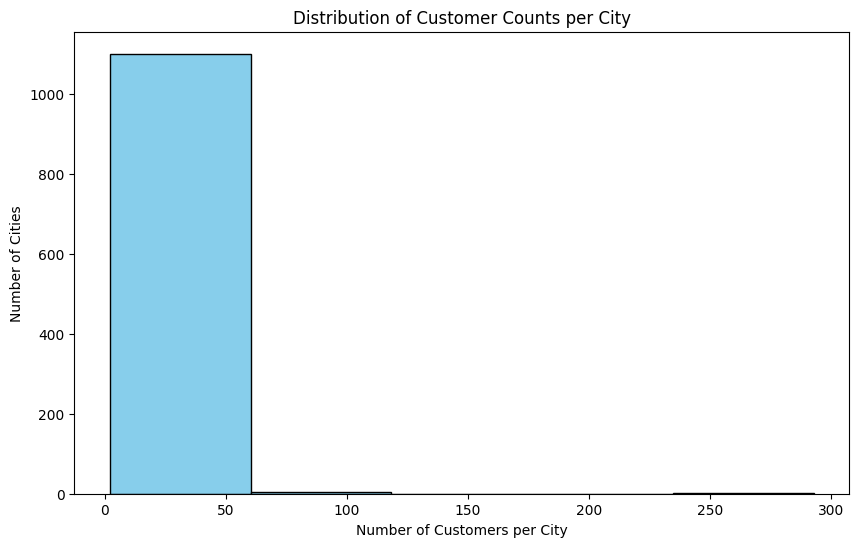

In [64]:
df = data.copy()

city_counts = df['city'].value_counts()

plt.figure(figsize=(10,6))
plt.hist(city_counts, bins=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Customer Counts per City")
plt.xlabel("Number of Customers per City")
plt.ylabel("Number of Cities")
plt.show()


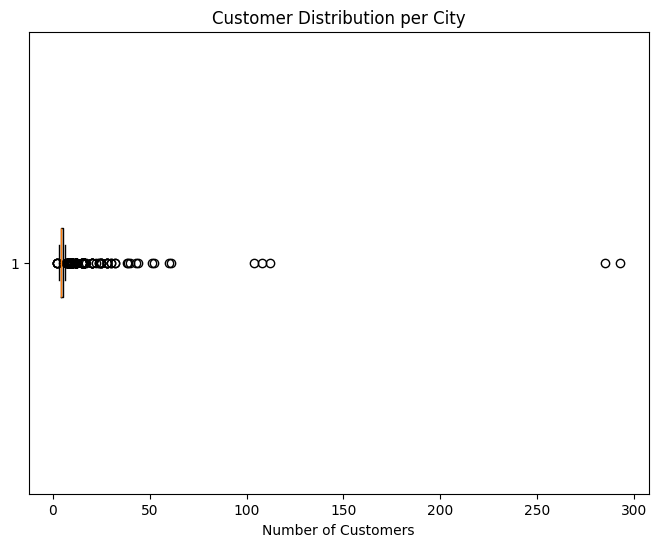

count    1106.000000
mean        6.367993
std        14.210290
min         2.000000
25%         4.000000
50%         4.000000
75%         5.000000
max       293.000000
Name: count, dtype: float64

In [65]:
plt.figure(figsize=(8,6))
plt.boxplot(city_counts, vert=False)
plt.title("Customer Distribution per City")
plt.xlabel("Number of Customers")
plt.show()

city_counts.describe()

Many cities with very low customer count mean of 6.3 and median of 4, will have to consider population size as well or just focus on cities with a high volume customers

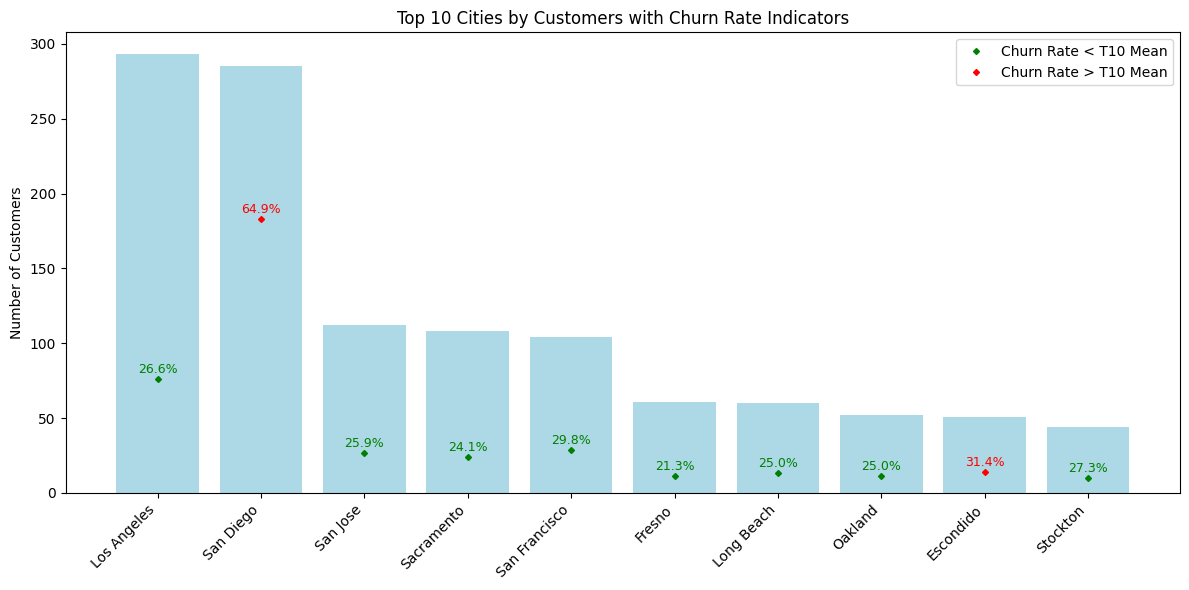

In [66]:
df = data.copy()

# Group by city: customer count + churn rate
city_churn = (
    df.groupby("city")
      .agg(
          num_customers=("customer_id", "count"),
          churn_rate=("churn_value", "mean")
      )
      .reset_index()
)

# Get the top 10 cities by customer count
top_cities_churn = city_churn.sort_values(by="num_customers", ascending=False).head(10)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(top_cities_churn["city"], top_cities_churn["num_customers"], color="lightblue")

# Add churn rate indicators inside bars
for bar, churn_rate in zip(bars, top_cities_churn["churn_rate"]):
    height = bar.get_height()
    y = height * churn_rate  # position of churn indicator
    x = bar.get_x() + bar.get_width() / 2

    # Place dot
    ax.plot(x, y - 2, 'rD' if churn_rate > top_cities_churn["churn_rate"].mean() else 'gD', markersize=3)

    # Place label (percentage to first decimal)
    ax.text(x, y, f"{churn_rate:.01%}", ha="center", va="bottom", fontsize=9, 
                        color="red" if churn_rate > top_cities_churn["churn_rate"].mean() else "green")

# Labels and title
ax.set_ylabel("Number of Customers")
ax.set_title("Top 10 Cities by Customers with Churn Rate Indicators")

plt.legend(['Churn Rate < T10 Mean', 'Churn Rate > T10 Mean'], loc='upper right')

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Among the company's top ten cities (by customer count), San Diego's churn rate appears exceptionally high in comparison to other cities.

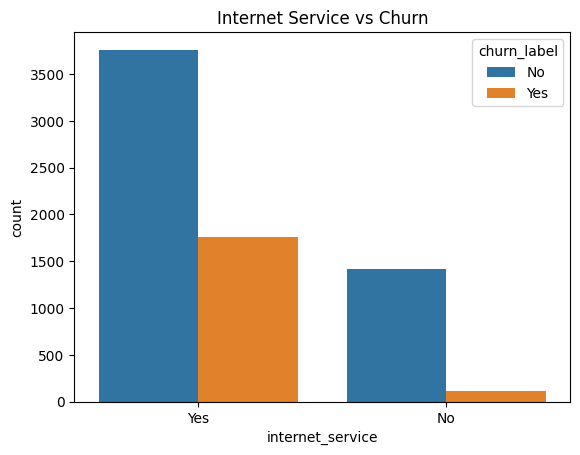

In [67]:
df = data.copy()
# Internet service vs churn
sns.countplot(data=df, x="internet_service", hue="churn_label")
plt.title("Internet Service vs Churn")
plt.show()

In [68]:
df = data.copy()

pd.crosstab(df['internet_service'], df['churn_label'], normalize='index')

churn_label,No,Yes
internet_service,,
No,0.925950,0.074050
Yes,0.681711,0.318289


<Axes: xlabel='internet_type', ylabel='count'>

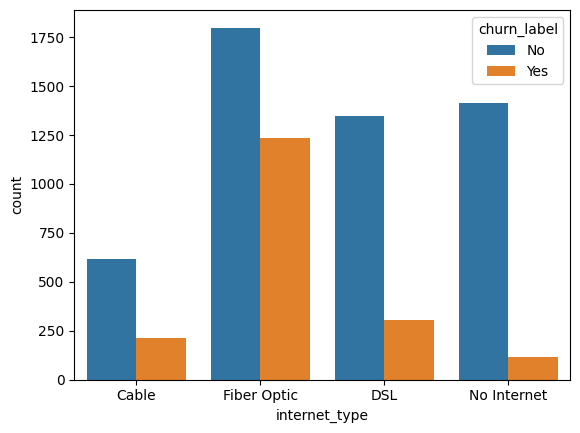

In [69]:
# Internet type vs churn
sns.countplot(data=df, x="internet_type", hue="churn_label")


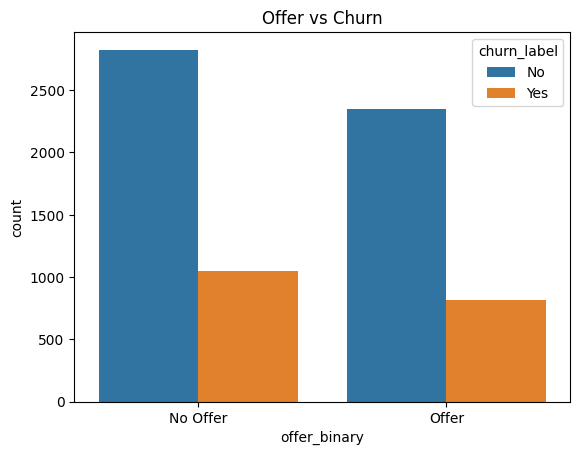

In [70]:
# Offer binary

df = data.copy()

df['offer_binary'] = np.where(df['offer'] == 'No Offer', 'No Offer', 'Offer')
sns.countplot(data=df, x="offer_binary", hue="churn_label")
plt.title("Offer vs Churn")
plt.show()

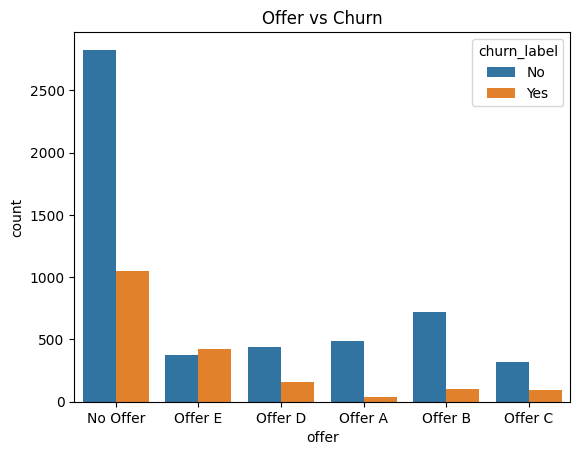

In [71]:
# Offer distribution
sns.countplot(data=df, x="offer", hue="churn_label")
plt.title("Offer vs Churn")
plt.show()

Offer E has a churn rate over 50%, significantly worse than other offers

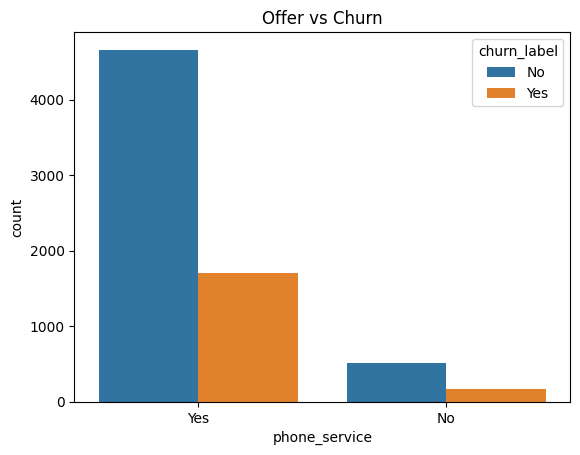

In [72]:
# Phone Service distribution
sns.countplot(data=df, x="phone_service", hue="churn_label")
plt.title("Offer vs Churn")
plt.show()

In [ ]:
# Churn rate by phone service
df = data.copy()

df.groupby('phone_service')['churn_value'].mean()


phone_service
No     0.249267
Yes    0.267096
Name: churn_value, dtype: float64

Class imbalance between customers using phone service and those that are not, but churn rates aren't significantly different

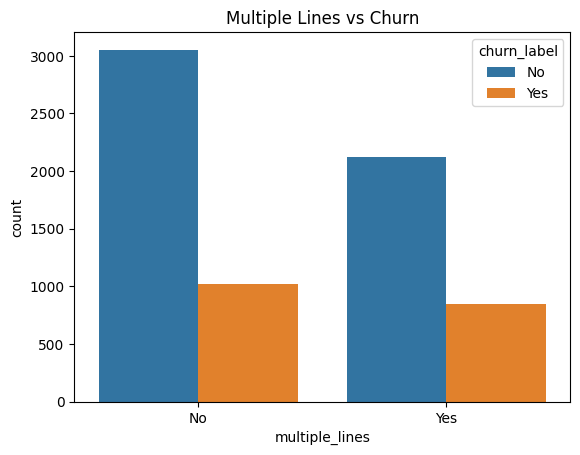

In [79]:
# Distribution of multiple lines users 
sns.countplot(data=df, x="multiple_lines", hue="churn_label")
plt.title("Multiple Lines vs Churn")
plt.show()

In [80]:
df.groupby('multiple_lines')['churn_value'].mean()

multiple_lines
No     0.250246
Yes    0.286099
Name: churn_value, dtype: float64

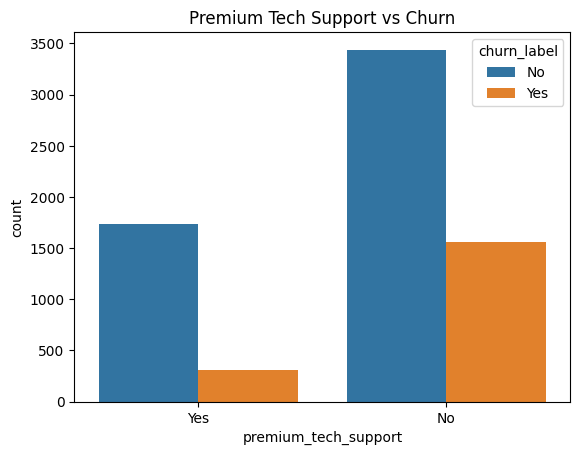

In [82]:
sns.countplot(data=df, x="premium_tech_support", hue="churn_label")
plt.title("Premium Tech Support vs Churn")
plt.show()

In [83]:
df.groupby('premium_tech_support')['churn_value'].mean()

premium_tech_support
No     0.311862
Yes    0.151663
Name: churn_value, dtype: float64

Churn rate for customers not receiving premium tech support is over double compared to those who did. Could be indicative of overall satisfaction with tech support

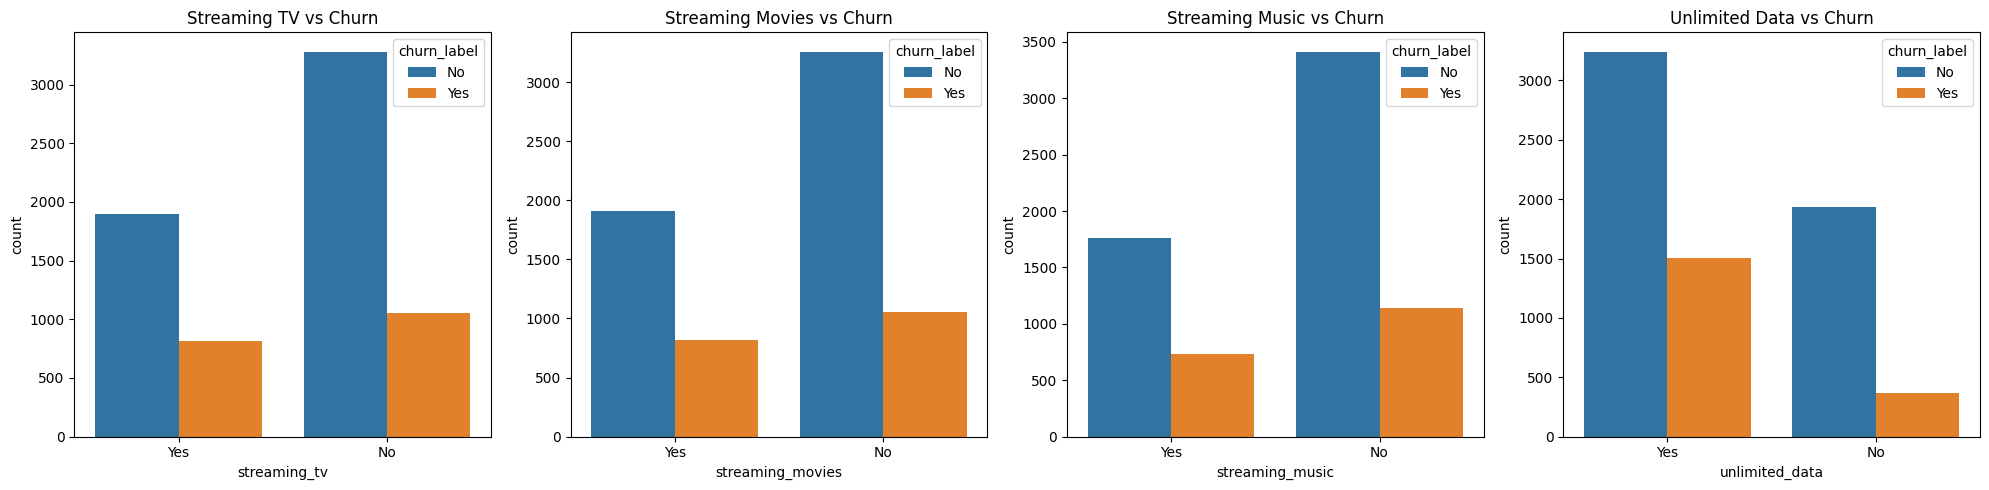

In [94]:
# Streaming service distributions
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.countplot(data=df, x="streaming_tv", hue="churn_label", order=['Yes', 'No'], ax=axes[0])
axes[0].set_title('Streaming TV vs Churn')

sns.countplot(data=df, x="streaming_movies", hue="churn_label", order=['Yes', 'No'], ax=axes[1])
axes[1].set_title('Streaming Movies vs Churn')

sns.countplot(data=df, x="streaming_music", hue="churn_label", order=['Yes', 'No'], ax=axes[2])
axes[2].set_title('Streaming Music vs Churn')

sns.countplot(data=df, x="unlimited_data", hue="churn_label", order=['Yes', 'No'], ax=axes[3])
axes[3].set_title('Unlimited Data vs Churn')

plt.tight_layout()
plt.show()

In [95]:
streaming_tv_churn_rate = df.groupby('streaming_tv')['churn_value'].mean()
streaming_movies_churn_rate = df.groupby('streaming_movies')['churn_value'].mean()
streaming_music_churn_rate = df.groupby('streaming_music')['churn_value'].mean()
unlimited_data_churn_rate = df.groupby('unlimited_data')['churn_value'].mean()

print("Churn Rate by Streaming TV:\n", streaming_tv_churn_rate)
print("\nChurn Rate by Streaming Movies:\n", streaming_movies_churn_rate)
print("\nChurn Rate by Streaming Music:\n", streaming_music_churn_rate)
print("\nChurn Rate by Unlimited Data:\n", unlimited_data_churn_rate)

Churn Rate by Streaming TV:
 streaming_tv
No     0.243312
Yes    0.300702
Name: churn_value, dtype: float64

Churn Rate by Streaming Movies:
 streaming_movies
No     0.243795
Yes    0.299414
Name: churn_value, dtype: float64

Churn Rate by Streaming Music:
 streaming_music
No     0.250494
Yes    0.292605
Name: churn_value, dtype: float64

Churn Rate by Unlimited Data:
 unlimited_data
No     0.159704
Yes    0.316544
Name: churn_value, dtype: float64


<Axes: xlabel='contract', ylabel='count'>

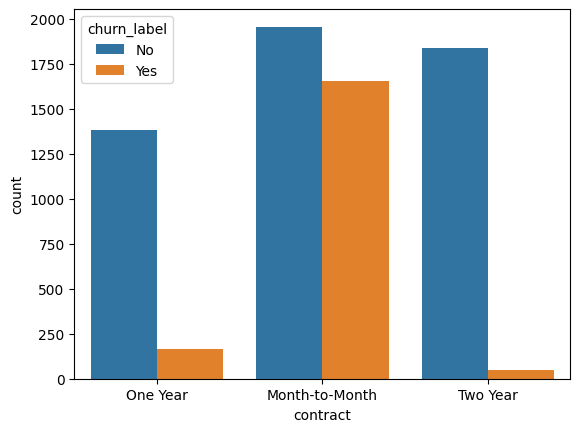

In [97]:
sns.countplot(data=df, x="contract", hue="churn_label")

In [98]:
df.groupby('contract')['churn_value'].mean()

contract
Month-to-Month    0.458449
One Year          0.107097
Two Year          0.025491
Name: churn_value, dtype: float64

Customers under a month-to-month contract are significantly more likely to churn compared to those with longer term contracts (one or two year), even customers under two year contracts significantly less likely to churn.

Text(0.5, 1.0, 'Payment Method vs Churn')

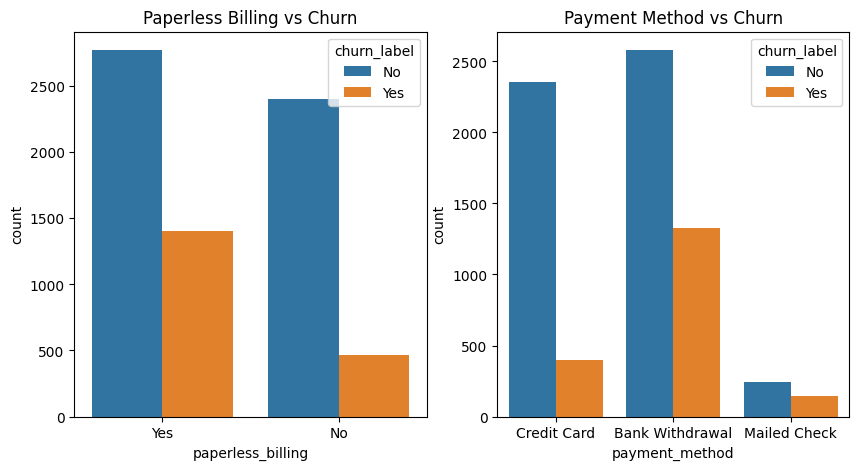

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=df, x="paperless_billing", hue="churn_label", ax=axes[0])
axes[0].set_title('Paperless Billing vs Churn')

sns.countplot(data=df, x="payment_method", hue="churn_label", ax=axes[1])
axes[1].set_title('Payment Method vs Churn')

In [100]:
paperless_billing_churn_rate = df.groupby('paperless_billing')['churn_value'].mean()
payment_method_churn_rate = df.groupby('payment_method')['churn_value'].mean()

print("Churn Rate by Paperless Billing:\n", paperless_billing_churn_rate)
print("\nChurn Rate by Payment Method:\n", payment_method_churn_rate)

Churn Rate by Paperless Billing:
 paperless_billing
No     0.163301
Yes    0.335651
Name: churn_value, dtype: float64

Churn Rate by Payment Method:
 payment_method
Bank Withdrawal    0.339985
Credit Card        0.144780
Mailed Check       0.368831
Name: churn_value, dtype: float64


<Axes: xlabel='satisfaction_score', ylabel='count'>

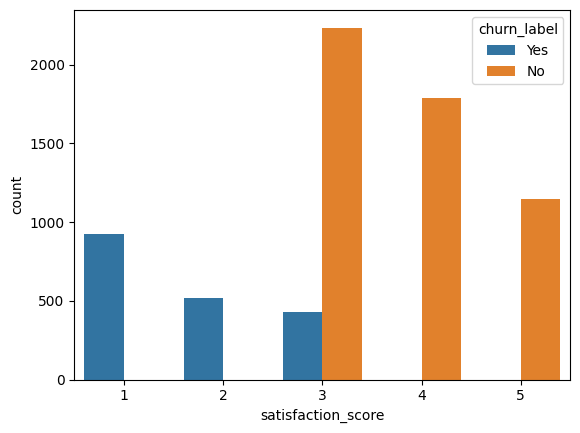

In [103]:
sns.countplot(data=df, x='satisfaction_score', hue='churn_label')

In [73]:
data.columns

Index(['customer_id', 'gender', 'age', 'under_30', 'senior_citizen', 'married',
       'dependents', 'num_dependents', 'location_id', 'country', 'state',
       'city', 'zip_code', 'lat_long', 'latitude', 'longitude',
       'population_id', 'pop', 'service_id', 'referred_friend',
       'num_referrals', 'tenure_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charge', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'status_id', 'satisfaction_score', 'customer_status',
       'churn_label', 'churn_value', 'churn_score', 'cltv', 'churn_category',
       'chur